## Ankita Veerabahu
## LAB-1 Exercise-1

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Q.1 Write a user defined function ‘myFnLinReg(x,y)’ to perform Simple Linear Regression given one predictor attribute and one response attribute. The function should return the coefficients of the straight line.

In [2]:
#linear regression function using least squares method

def myFnLinReg(x, y):
    x=x.to_numpy()
    y=y.to_numpy()

    x_mean=np.mean(x)
    y_mean=np.mean(y)

    co_1= ((x - x_mean) * (y - y_mean)).sum()/((x - x_mean)**2).sum()
    co_0= y_mean - co_1*x_mean
    
    return(co_1, co_0)

### Q.2 Use mtcars data set and consider the attributes mpg and weight. Split data into train and test sets (70 %,30%). Put training data set to ‘myFnLinReg(x,y)’ to build a linear regression model to predict mpg given the weight of the car.

In [3]:
df=pd.read_csv("mtcars.csv")
df.dropna(axis = 1)
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
X=df[['wt']]
y=df[['mpg']]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

co_1, co_0= myFnLinReg(X_train, y_train)
co_1, co_0

(-5.356146516920027, 37.04389561140619)

### Q.3 What is the mpg of a car, whose weight is 6.7?

In [5]:
print("mpg of a car, whose weight is 6.7  is ",(co_0+ co_1*6.7))


mpg of a car, whose weight is 6.7  is  1.1577139480420158


### Q.4 Compute and print accuracy measures such as RMSE and R2 for the test set.

In [16]:
preds=[]
for i in range(len(X_test)):
    pred=(X_test.values[i]*co_1)+co_0
    preds.append(pred)
predictions = np.array(preds)    
predictions  

array([[22.20736976],
       [ 7.9921569 ],
       [16.44951225],
       [25.26037327],
       [20.17203408],
       [18.61875159],
       [17.92245255],
       [26.6797521 ],
       [17.0654691 ],
       [23.01079174]])

In [7]:
y_test.to_numpy()
num=((predictions-y_test)**2).sum()
den= len(predictions)
rmse=np.sqrt(num/den)
print("RMSE =", rmse.values)
    

RMSE = [3.01482741]


In [21]:
r2= 1- (num/((np.mean(y_test)-y_test)**2).sum())
print("R2 =", r2.values)

R2 = [0.73256171]


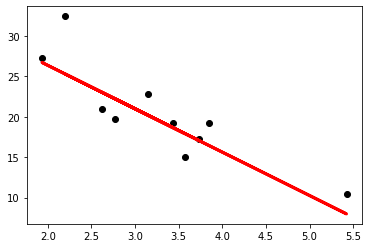

In [9]:
plt.scatter(X_test.values, y_test.values, color="black")
plt.plot(X_test.values, predictions, color="red", linewidth=3)

### Q.5 Apply the stochastic gradient descent and mini batch gradient descent algorithms to enhance the accuracy and visualize the cost function.

In [25]:
import random
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.05):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
      
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list


w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(X_train.values,y_train.values.reshape(y_train.shape[0],),15000)
w_sgd, b_sgd, cost_sgd

(array([-5.34468315]), 36.81106487192021, 3.5890594155195306)

In [26]:
# weight=-5.11772202 bias= 36.6287279915539

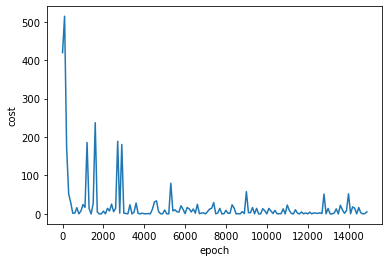

In [27]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [13]:
import random
def mb_gradient_descent(X, y_true, epochs, learning_rate = 0.05):
 
    number_of_features = X.shape[1]
   
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        indices = np.random.randint(0,total_samples-1,10) #10 random indices for minibatch from total samples
        sample_x = X[indices]
        sample_y = y_true[indices]
        
    
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        
        b = b - learning_rate * b_grad
        b=b.mean()
        
        cost = np.square(sample_y-y_predicted)
        cost=cost.mean()
       
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = mb_gradient_descent(X_train.values,y_train.values.reshape(y_train.shape[0],),15000)
w_sgd, b_sgd, cost_sgd

(array([-5.33131392]), 36.84808589611597, 13.547475377800714)

In [14]:
# weight=-5.46930211 bias= 36.982359214197274

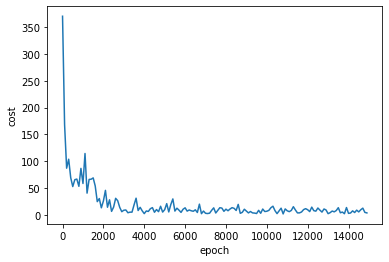

In [15]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)